<a href="https://colab.research.google.com/github/IndraniMandal/New-Revisions/blob/main/Model_interpretability_Pancreatic_cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cross validation and Model Interpretability

In this notebook, we will go over the following topics:

1. Cross validation
2. Model interpretability

## Cross validation
Cross validation can be another powerful preventative measure against overfitting. Why? Imagine if your test training split is a bad split. To overcome this difficulty we now split the training dataset into training and validation set.

<img src = "https://drive.google.com/uc?id=1WxAKTTrm4agcR0ema4VRPQ0LmK5EWp06" width=500>

In the figure above, the training data is split into `k` number of smaller sets, to validate the model. We can vary the number of sets `k` between 3 and 10. In case of a 5-fold cross validation the training set is split into 5 smaller sets. 5 models are trained  with a different validation set at every iteration. The Blue Fold in each split is the validation set and the Green Folds are used for training. This way the models are tested with different sets of unseen data. 

###Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer

  0% 0.00/18.0k [00:00<?, ?B/s]
100% 18.0k/18.0k [00:00<00:00, 11.5MB/s]


In [ ]:
!unzip /content/urinary-biomarkers-for-pancreatic-cancer.zip
!rm /content/urinary-biomarkers-for-pancreatic-cancer.zip

Archive:  /content/urinary-biomarkers-for-pancreatic-cancer.zip
  inflating: Debernardi et al 2020 data.csv  
  inflating: Debernardi et al 2020 documentation.csv  


In [ ]:
import pandas as pd
cancer_data = pd.read_csv("/content/Debernardi et al 2020 data.csv")
cancer_data.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [ ]:
cancer_data.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

###Preprocessing Data
Drop the columns that are not related to the diagnosis like 'sample_id', 'patient_cohort', and 'sample_origin'. We are unsure how to substitute  for missing values in 'stage', 'benign_sample_diagnosis'. I am setting them aside for right now. This is where we could have used a domain expert. 

In [ ]:
cancer_data = cancer_data.drop(['sample_id', 'patient_cohort', 'sample_origin'], axis=1) # drop the 'ID' column


In [ ]:
cancer_data = cancer_data.drop(['stage', 'benign_sample_diagnosis'], axis=1)

In [ ]:
cancer_data.isnull().sum()

age                0
sex                0
diagnosis          0
plasma_CA19_9    240
creatinine         0
LYVE1              0
REG1B              0
TFF1               0
REG1A            284
dtype: int64

###Data Imputation
We have a lot of missing data which we need to handle. We are going to replace the missing values my the mode of that column. 

In [ ]:
for c in cancer_data.columns:
    cancer_data[c].fillna(cancer_data[c].mode()[0], inplace=True)

cancer_data.isnull().sum()

age              0
sex              0
diagnosis        0
plasma_CA19_9    0
creatinine       0
LYVE1            0
REG1B            0
TFF1             0
REG1A            0
dtype: int64

###Split the Dataset into features and target


In [ ]:
cancer_features= cancer_data.drop('diagnosis', axis=1) # drop the target column
target = cancer_data.diagnosis

In [ ]:
cancer_data12 = cancer_data[cancer_data.diagnosis != 3]
cancer_features12 = cancer_data12.drop('diagnosis', axis=1) # drop the target column
target12 = cancer_data12.diagnosis

In [ ]:
cancer_data23 = cancer_data[cancer_data.diagnosis != 1]
cancer_features23 = cancer_data23.drop('diagnosis', axis=1) # drop the target column
target23 = cancer_data23.diagnosis

In [ ]:
cancer_data13 = cancer_data[cancer_data.diagnosis != 2]
cancer_features13 = cancer_data13.drop('diagnosis', axis=1) # drop the target column
target13 = cancer_data13.diagnosis

###Split the Dataset for training and testing


This initial split is for determining the accuracy of the entire dataset.

In [ ]:
#From the model selection library import the function for splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split 

# Split the dataset (80% for train set and 20% in test set)
X_train, X_test, y_train, y_test = train_test_split(cancer_features, target, test_size=0.2, shuffle=True, random_state=42)

This split is for cases that only end up with the diagnosises, 1 = "Cancer-Free" and 2 = "Non-Cancerous Disease"

In [ ]:
# Split the dataset (80% for train set and 20% in test set)
X_train12, X_test12, y_train12, y_test12 = train_test_split(cancer_features12, target12, test_size=0.2, shuffle=True, random_state=42)

This split is for cases that only end up with the diagnosises, 2 = "Non-Cancerous Disease" and 3 = "Cancer"

In [ ]:
# Split the dataset (80% for train set and 20% in test set)
X_train23, X_test23, y_train23, y_test23 = train_test_split(cancer_features23, target23, test_size=0.2, shuffle=True, random_state=42)

This split is for cases that only end up with the diagnosises, 1 = "Cancer-Free" and 3 = "Cancer"

In [ ]:
# Split the dataset (80% for train set and 20% in test set)
X_train13, X_test13, y_train13, y_test13 = train_test_split(cancer_features13, target13, test_size=0.2, shuffle=True, random_state=42)

##Model building with cross validation



Let's keep it simple with easy to train & interprate models.

We will train a logistic regression model, a bagging random forest classifier and a gradient-boosted random forest classifier (xgboost) to predict malignancy based on the standardized features. We will use cross-validation to train multiple times our models on different samples of the dataset and we will evaluate the models on the validation set (the rest of the set after each split). This process is useful to be sure that we don't overfit by detecting patterns that exists only a particular split of a dataset.

In [ ]:
def balanced_accuracy_score(model, X_train, X_test, y_train): 
  from sklearn.metrics import balanced_accuracy_score
 
  model.fit(X_train, y_train)
  # Prediction using Testing data
  pred_test = model.predict(X_test)
  #calculate the balanced accuracy by comparing the true testing target and the predicted values
  return balanced_accuracy_score(y_test, pred_test)


###Logistic Regression with cross validation


In [ ]:
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score
#From the model selection library import logistic regression
from sklearn.linear_model import LogisticRegression

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

#models is a logistic regression model
lr=LogisticRegression(random_state=0, max_iter=10000) #maximum iteration is set to a high value of 10,000

scores = cross_val_score(lr, X_train, y_train,cv=cv)

print("Fold Accuracies: {}".format(scores))
lr_mean_score=scores.mean()
lr_balanced_acc=balanced_accuracy_score(lr, X_train, X_test, y_train)

Fold Accuracies: [0.67368421 0.69473684 0.67021277 0.61702128 0.64893617]


The accuracy score varies between 92%-98% when we use 5-fold cross validation with a mean accuracy of 95%. 

###Random forest with cross validation

In [ ]:
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

rf = RandomForestClassifier(random_state=42)

scores = cross_val_score(rf, X_train, y_train,cv=cv)

print("Fold Accuracies: {}".format(scores))
rf_mean_score=scores.mean()
rf_balanced_acc=balanced_accuracy_score(rf, X_train, X_test, y_train)

Fold Accuracies: [0.70526316 0.71578947 0.76595745 0.65957447 0.71276596]


We can see the accuracy score varies between 93%-98% when we use 5-fold cross validation with a mean accuracy of 96%. 

###XGBoost with cross validation

In [ ]:
import xgboost
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score

# XGBClassifier
xgb = xgboost.XGBClassifier(random_state=42)

# do the 5-fold cross validation and shuffle the data
cv = KFold(n_splits=5,  shuffle = True)

scores = cross_val_score(xgb, X_train, y_train,cv=cv)

print("Fold Accuracies: {}".format(scores))
xgb_mean_score=scores.mean()
xgb_balanced_acc=balanced_accuracy_score(xgb, X_train, X_test, y_train)

Fold Accuracies: [0.76842105 0.70526316 0.65957447 0.68085106 0.69148936]




https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/maskers/custom.html

In [ ]:
import xgboost
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score

# XGBClassifier
xgb12 = xgboost.XGBClassifier(random_state=42).fit(X_train12.values, y_train12)

# do the 5-fold cross validation and shuffle the data
cv12 = KFold(n_splits=5,  shuffle = True)

scores12 = cross_val_score(xgb12, X_train12, y_train12,cv=cv)

print("Fold Accuracies: {}".format(scores12))

Fold Accuracies: [0.79365079 0.73015873 0.70967742 0.70967742 0.69354839]


In [ ]:
import xgboost
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score

# XGBClassifier
xgb23 = xgboost.XGBClassifier(random_state=42).fit(X_train23.values, y_train23)

# do the 5-fold cross validation and shuffle the data
cv23 = KFold(n_splits=5,  shuffle = True)

scores23 = cross_val_score(xgb23, X_train23, y_train23,cv=cv)

print("Fold Accuracies: {}".format(scores23))

Fold Accuracies: [0.75384615 0.87692308 0.84615385 0.8        0.78461538]


In [ ]:
import xgboost
# import kFold and cross validation score
from sklearn.model_selection import KFold, cross_val_score

# XGBClassifier
xgb13 = xgboost.XGBClassifier(random_state=42).fit(X_train23.values, y_train23)

# do the 5-fold cross validation and shuffle the data
cv13 = KFold(n_splits=5,  shuffle = True)

scores13 = cross_val_score(xgb13, X_train13, y_train13,cv=cv)

print("Fold Accuracies: {}".format(scores13))

Fold Accuracies: [0.91803279 0.91803279 0.90163934 0.90163934 0.86885246]


The accuracy score varies between 95%-97% when we use 5-fold cross validation with a mean accuracy of 96%. 

##Model Selection

###Model Comparison
Let's compare the models we have created.

In [ ]:
acc_scores = pd.DataFrame([ [lr_mean_score, lr_balanced_acc],[rf_mean_score, rf_balanced_acc],[xgb_mean_score, xgb_balanced_acc] ],  columns=['Mean Accuracy', 'Balanced accuracy'], 
                      index =['Logistic Regression', 'Random Forest', 'XGBoost'] )
acc_scores

,Mean Accuracy,Balanced accuracy
Logistic Regression,0.660918,0.703290
Random Forest,0.711870,0.740013
XGBoost,0.701120,0.728931


By looking at the mean accuracy and the balanced accuracy across all splits, the Random Forest model seems to perform better than the other models.
Next step would be checking to see if the models are overfitting. This involves training the models again on the entire train set and then evaluate the models on the train set and the test set. We have already done this exercise in the last module on Overfitting. 

<img src = "https://drive.google.com/uc?id=1xhp1IjCg72QCfJZZNfJG1v_oa6D0c-KQ" width=500>

###Exercise 1
**Check for overfitting**
Go back to Module 15 and investigate the following sections:
1. **Model building** - Train the models on the entire train set
2. **Plot the model metrics** - Evaluate the models on the train set and the test set
3. What can you conclude from the *Train Dataset* plot?
4. What can you conclude from the *Test Dataset* plot?
5. Which model should we choose?

## How can we interpret the our models


We can also plot the first decisions made by a tree from our random forest.

[Ellipsis]

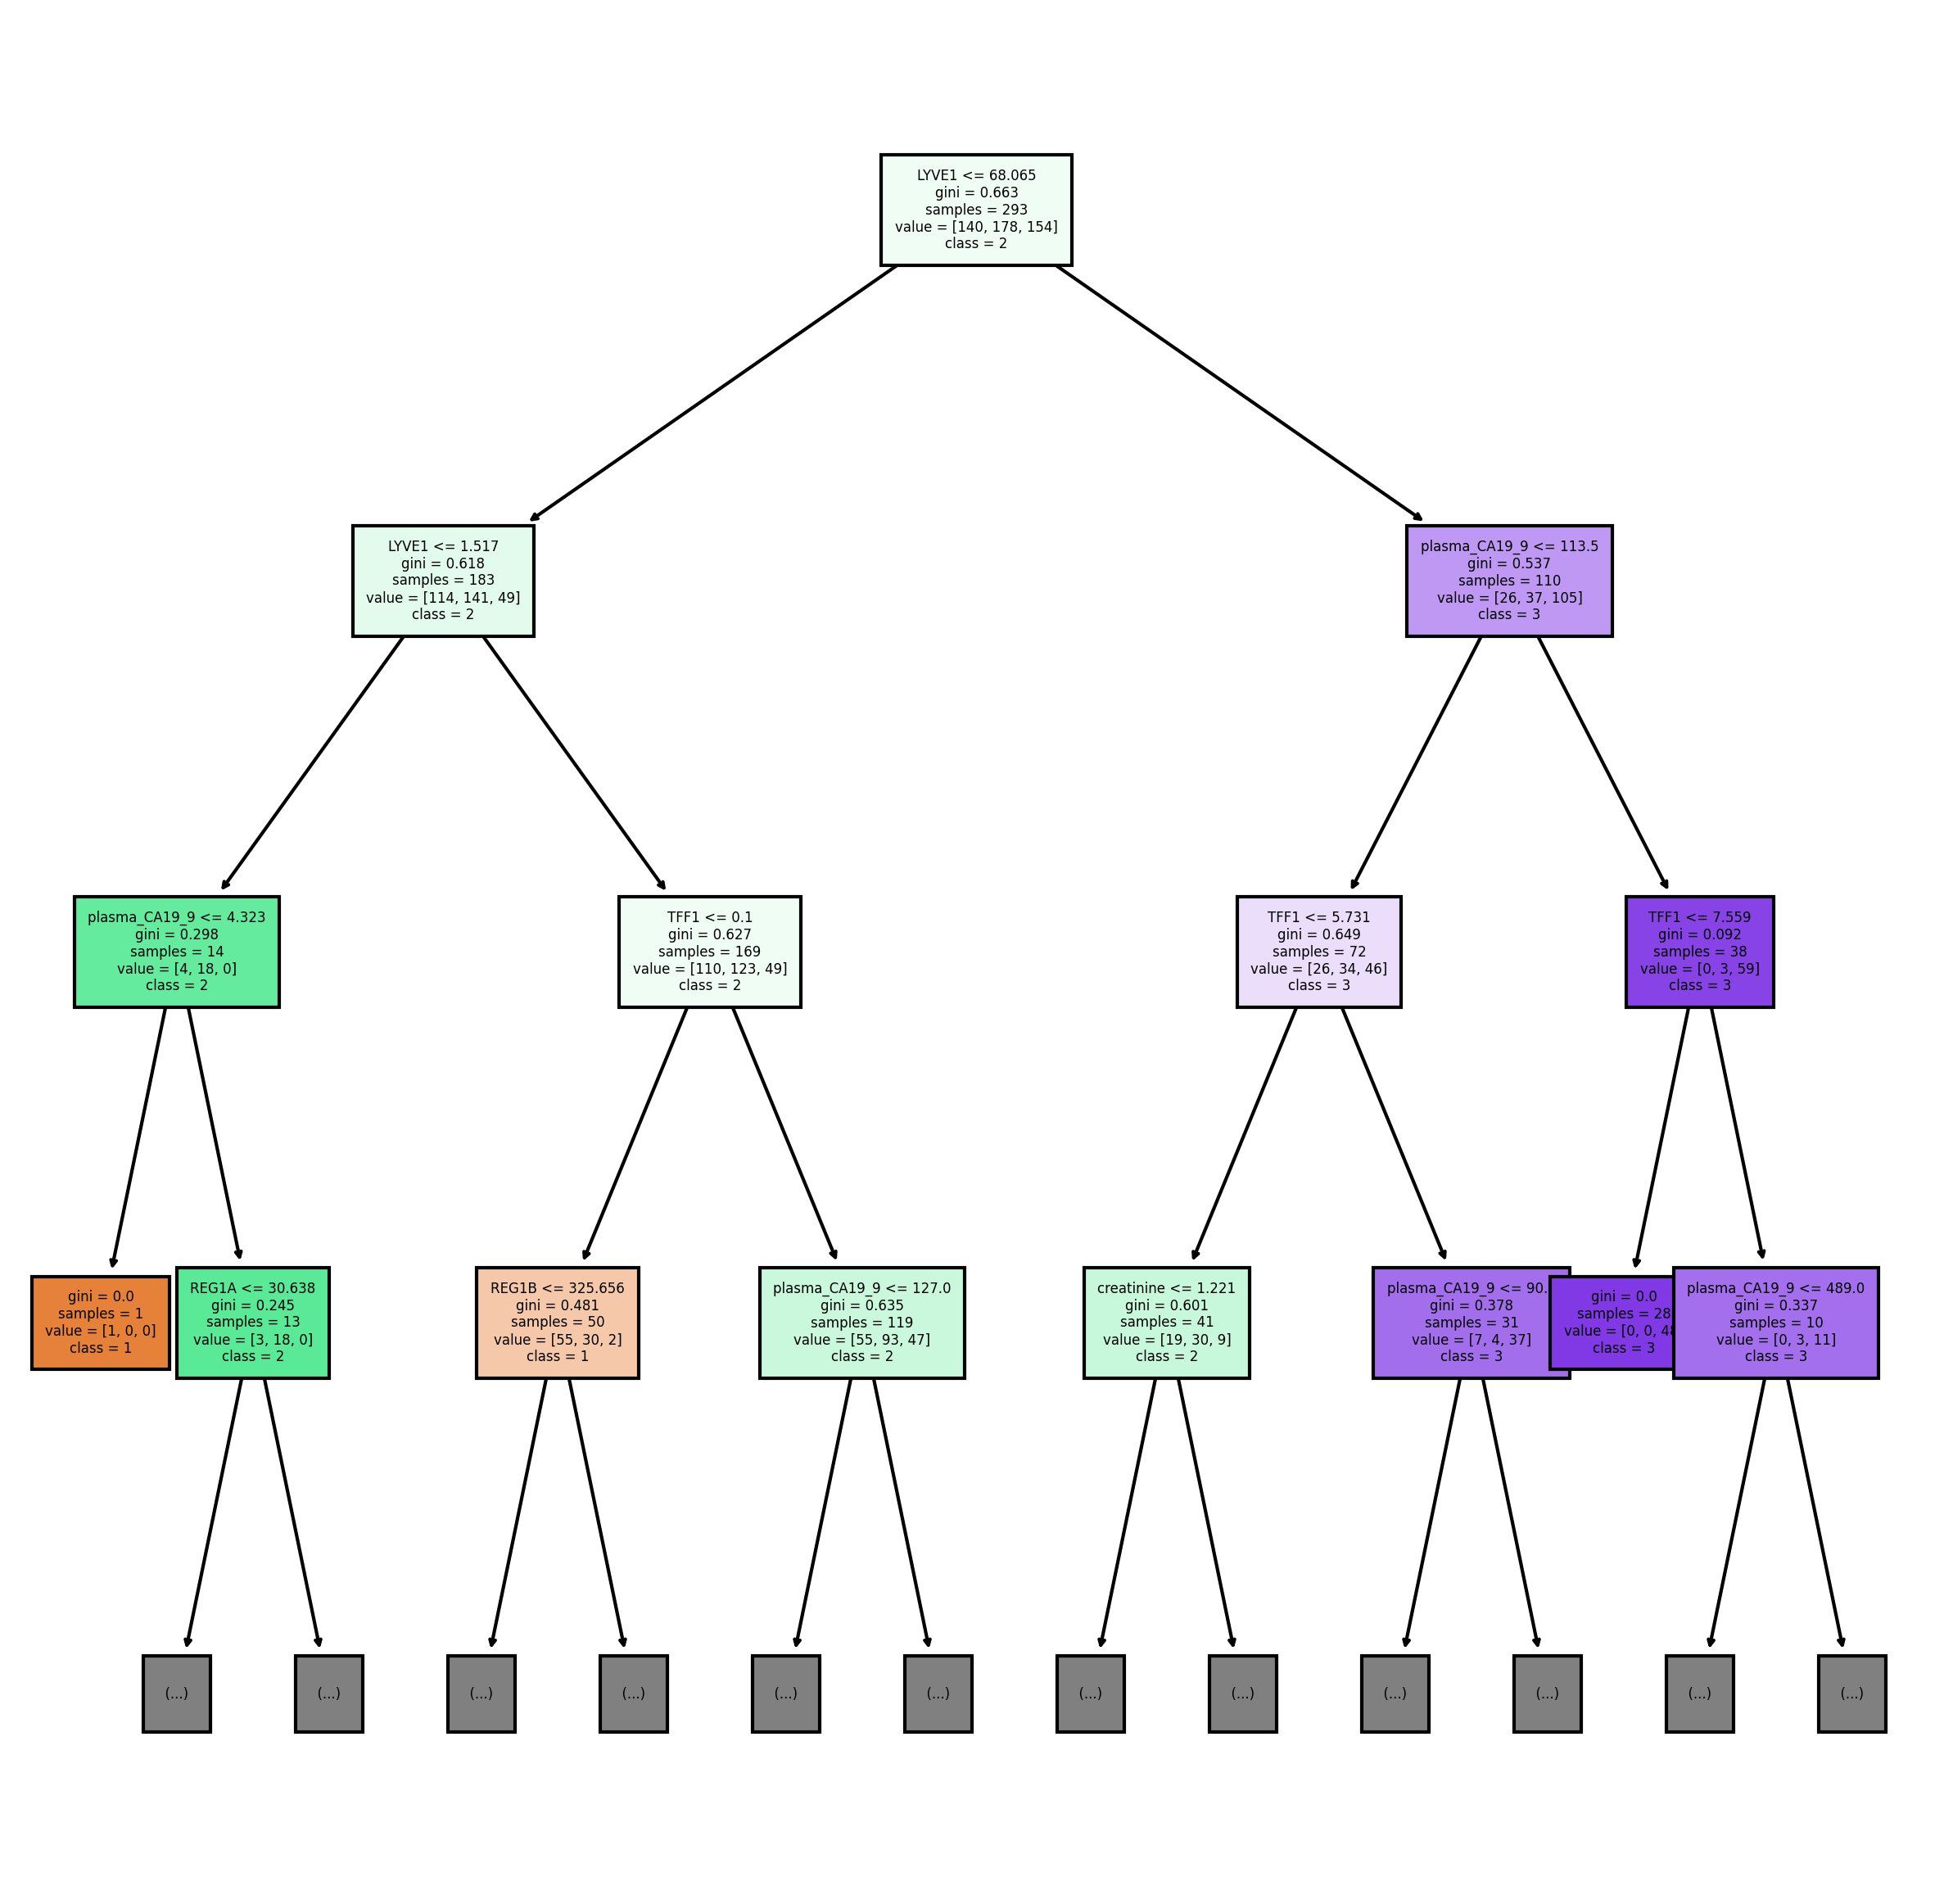

In [ ]:
# Visualize a tree model from random forest
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree

fig, axes = plt.subplots(1, 1, figsize=(10, 10), dpi=300)
plot_tree(decision_tree = rf.estimators_[0], 
          fontsize=4, filled=True, 
          max_depth=3,
          feature_names=cancer_features.columns,
          class_names=['1', '2', '3'])
[...]

The most improtant features used by the tree in our Random forest are:


*   concave points 
*   area
*   texture

Concave points and area are both directly or indirectly a measure of the size of the tumor. We can see if the tumor is large it is most likely to me malignant.  


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


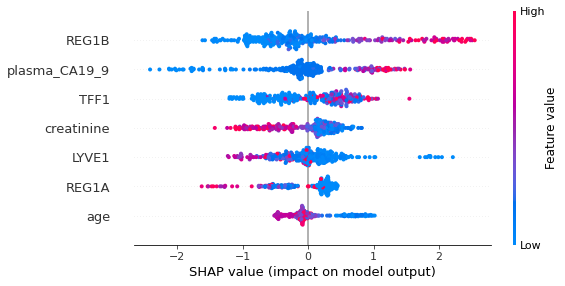

In [ ]:
import shap

explainer12 = shap.Explainer(xgb12)
shap_values12 = explainer12(X_train12)
shap.plots.beeswarm(shap_values12)

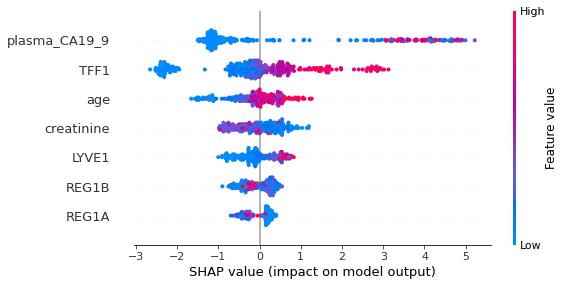

In [ ]:
import shap

explainer23 = shap.Explainer(xgb23)
shap_values23 = explainer23(X_train23)
shap.plots.beeswarm(shap_values23)

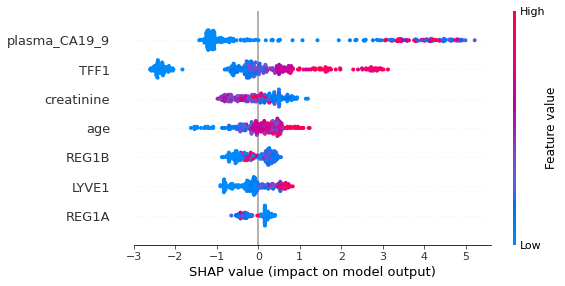

In [ ]:
import shap

explainer13 = shap.Explainer(xgb13)
shap_values13 = explainer13(X_train13)
shap.plots.beeswarm(shap_values13)

Most predictive features according to shap values are:

*   area: as the area of the tunor increases the tumor is more likely to be malignant
*   concave points
*   perimeter
*   texture

Intuitively, it seems like these features associated with the size of the tumor should be predictive of a malignant tumor. We can use shap values to confirm this fact.

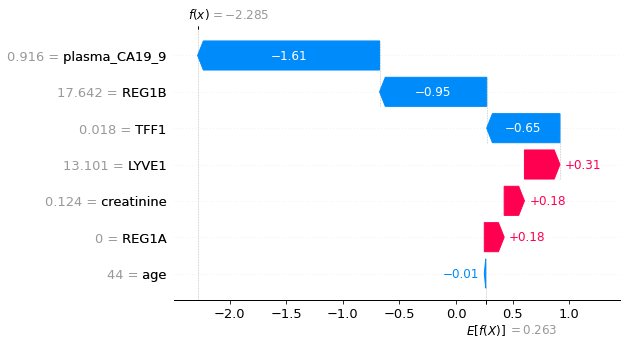

In [ ]:
shap.plots.waterfall(shap_values12[0])

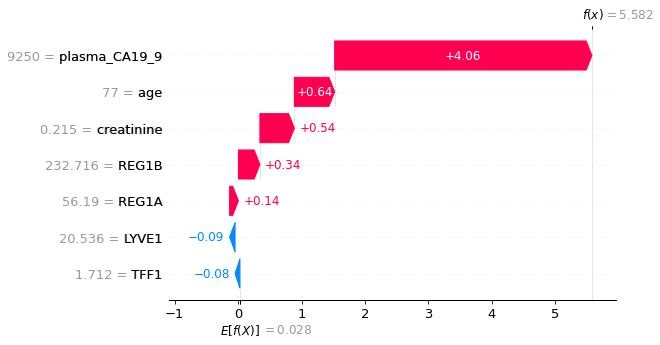

In [ ]:
shap.plots.waterfall(shap_values23[0])

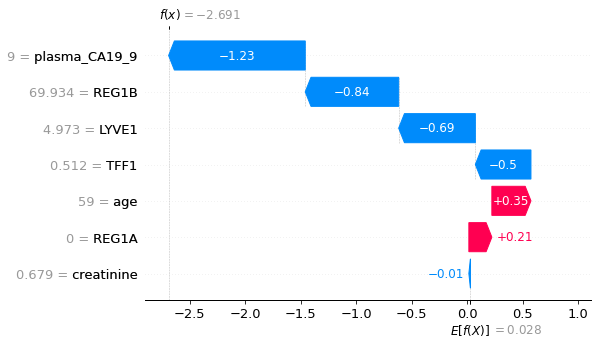

In [ ]:
shap.plots.waterfall(shap_values13[0])